In [38]:
from torchvision.datasets import VOCDetection
from PIL import Image, ImageDraw, ImageFont
from torchvision.transforms.functional import to_tensor, to_pil_image
import torchvision.transforms as transforms
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import os
import numpy as np
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt

In [2]:
# VOC 2007 dataset을 저장할 위치
path2data = './data'
if not os.path.exists(path2data):
    os.mkdir(path2data)

In [25]:
classes = [
    "aeroplane",
    "bicycle",
    "bird",
    "boat",
    "bottle",
    "bus",
    "car",
    "cat",
    "chair",
    "cow",
    "diningtable",
    "dog",
    "horse",
    "motorbike",
    "person",
    "pottedplant",
    "sheep",
    "sofa",
    "train",
    "tvmonitor"
]

In [78]:
class MyCustomDatasets(VOCDetection):
    def __getitem__(self, idx):
        img = np.array(Image.open(self.images[idx]).convert('RGB'))
        target = self.parse_voc_xml(ET.parse(self.annotations[idx]).getroot())

        coordinates = []
        labels = []

        for obj in target['annotation']['object']:
            coordinates.append([int(val) for key, val in obj['bndbox'].items()])
            labels.append(classes.index(obj['name']))

        if self.transforms:
            img, target = self.transforms(img, coordinates)

        return img, coordinates, labels


In [79]:
train_ds = MyCustomDatasets(path2data, year='2007', image_set='train', download=True)
val_ds = MyCustomDatasets(path2data, year='2007', image_set='test', download=True)

Using downloaded and verified file: ./data/VOCtrainval_06-Nov-2007.tar
Extracting ./data/VOCtrainval_06-Nov-2007.tar to ./data
Using downloaded and verified file: ./data/VOCtest_06-Nov-2007.tar
Extracting ./data/VOCtest_06-Nov-2007.tar to ./data


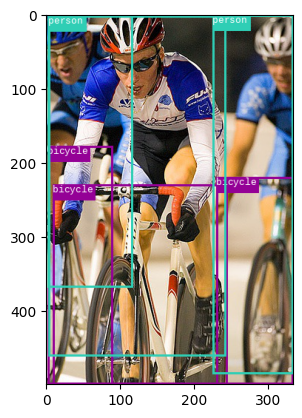

In [126]:
img, coordinates, labels = train_ds[2]
colors = np.random.randint(0, 255, size=(80,3), dtype=np.uint8)

img = to_pil_image(img)
draw = ImageDraw.Draw(img)
for bbox, label in zip(coordinates, labels):
    color = colors[label]
    name = classes[label]
    font_dir = "/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf"
    font = ImageFont.truetype(font_dir, 13)
    draw.rectangle(((bbox[0], bbox[1]), (bbox[2],bbox[3])), outline=tuple(color), width = 3)
    
    space_name = name
    w, h = draw.textsize(space_name)
    w, h = w+15, h+10
    draw.rectangle(((bbox[0], bbox[1]), (bbox[0]+w, bbox[1]+h)), fill = tuple(color + [0]))
    draw.text((bbox[0],bbox[1]), space_name, fill=(255,255,255,0), font=font, align='center')

plt.imshow(np.array(img))